In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle

# create model
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch
from sklearn.ensemble import GradientBoostingClassifier


Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.7/dist-packages (1.0.2)


#**Clustering**

## Data loading

In [ ]:
pd.set_option("display.max_rows", 50)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/new_date_Vehicule_police_class2.csv')
df.columns

Index(['Unnamed: 0', 'CodePolice_id', 'codeCompagnie_id', 'codeAgence',
       'typeIntermediaire', 'numPolice', 'naturePolice', 'typePolice',
       'Etat_Police', 'dateEffetPolice', 'DATE_RESILIATION',
       'Date_Suspenssion', 'dateEcheancePolice', 'CodeBonusMalus_id',
       'CodeVehicule_id', 'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage',
       'ETAT_VEHICULE', 'DATE_AFFECTATION', 'classeBonusMalus',
       'classeBonusMalusCompagnie', 'coefBonusMalus', 'puissanceFiscal',
       'typeImmatriculation', 'energie', 'dateInsertion', 'codeMarque',
       'numImmatriculation'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,DATE_RESILIATION,Date_Suspenssion,dateEcheancePolice,CodeBonusMalus_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,puissanceFiscal,typeImmatriculation,energie,dateInsertion,codeMarque,numImmatriculation
0,0,269447,1,768,1,20135.0017259/2,R,I,R,2013-03-13,1900-01-01,1900-01-01,3.13,270626,240354,230017,229942,1,V,2016-03-13 00:00:00.000000,2,2,80,4,TU,ESSENCE,2017-10-05,119,2290TU94
1,1,269752,1,724,1,20145.0016151/7,R,I,V,2014-03-14,1900-01-01,1900-01-01,3.14,270931,240640,230292,230217,1,V,2016-03-14 00:00:00.000000,2,2,80,4,TU,ESSENCE,2017-10-05,107,970TU116
2,2,269963,1,681,1,201750000022036,R,I,V,2017-03-14,1900-01-01,1900-01-01,3.14,271142,240806,230457,230382,1,V,2017-03-14 00:00:00.000000,4,4,100,4,TU,ESSENCE,2017-10-05,29,3560TU101
3,3,269978,1,785,3,201750000022081,R,I,V,2017-03-14,1900-01-01,1900-01-01,3.14,271157,240816,230467,230392,1,V,2017-03-14 00:00:00.000000,4,4,100,5,TU,GASOIL,2017-10-05,96,4493TU72
4,4,270019,1,623,1,201750000022179,R,I,V,2017-03-14,1900-01-01,1900-01-01,3.14,271198,240849,230497,230422,1,V,2017-03-14 00:00:00.000000,6,6,140,5,TU,ESSENCE,2017-10-05,107,7658TU83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22660,22660,268897,1,765,1,201750000021577,T,I,V,2017-03-11,1900-01-01,1900-01-01,NaN,270076,239835,229527,229452,1,V,2017-03-11 00:00:00.000000,4,4,100,5,TU,ESSENCE,2017-10-05,30,232TU171
22661,22661,269067,1,744,3,20145.0015626/2,R,I,V,2014-03-12,1900-01-01,1900-01-01,3.12,270246,240001,229683,229608,1,V,2016-03-12 00:00:00.000000,5,5,120,4,TU,ESSENCE,2017-10-05,30,6956TU89
22662,22662,269184,1,776,1,201650000020869,R,I,R,2016-03-12,1900-01-01,1900-01-01,3.12,270363,240117,214674,214598,1,V,2016-03-12 00:00:00.000000,4,4,100,5,TU,GASOIL,2017-10-05,105,8844TU90
22663,22663,269187,1,747,1,201650000020874,R,I,R,2016-03-12,1900-01-01,1900-01-01,3.12,270366,240120,229787,229712,1,V,2016-03-12 00:00:00.000000,6,6,140,7,TU,ESSENCE,2017-10-05,30,1334TU187


In [ ]:
columns_list=['CodePolice_id', 'codeCompagnie_id', 'codeAgence',
       'typeIntermediaire', 'numPolice', 'naturePolice', 'typePolice',
       'Etat_Police', 'dateEcheancePolice', 'ETAT_VEHICULE',
       'CodeBonusMalus_id', 'CodeVehicule_id', 'CodeAssure_id',
       'CodeSouscripteur_id', 'codeUsage', 'classeBonusMalus',
       'classeBonusMalusCompagnie', 'coefBonusMalus',
       'dateInsertion', 'numImmatriculation',
       'dateInsertion_year', 'dateInsertion_day_sin', 'dateInsertion_day_cos',
       'dateInsertion_month_sin', 'dateInsertion_month_cos',
       'Date_Suspenssion_year', 'Date_Suspenssion_day_sin',
       'Date_Suspenssion_day_cos', 'Date_Suspenssion_month_sin',
       'Date_Suspenssion_month_cos', 'DATE_RESILIATION_month_cos',
       'DATE_RESILIATION_month_sin', 'DATE_RESILIATION_day_cos',
       'DATE_RESILIATION_day_sin', 'DATE_RESILIATION_year',
       'dateEffetPolice_year', 'dateEffetPolice_day_sin',
       'dateEffetPolice_day_cos', 'dateEffetPolice_month_sin',
       'dateEffetPolice_month_cos', 'typeImmatriculation_CD',
       'typeImmatriculation_CMD', 'typeImmatriculation_ES',
       'typeImmatriculation_MD', 'typeImmatriculation_PAT',
       'typeImmatriculation_REM', 'typeImmatriculation_RS',
       'typeImmatriculation_TRAC', 'typeImmatriculation_TU']       

In [ ]:
len(columns_list)

49

In [ ]:
df.dtypes

Unnamed: 0                     int64
CodePolice_id                  int64
codeCompagnie_id               int64
codeAgence                    object
typeIntermediaire              int64
numPolice                     object
naturePolice                  object
typePolice                    object
Etat_Police                   object
dateEffetPolice               object
DATE_RESILIATION              object
Date_Suspenssion              object
dateEcheancePolice           float64
CodeBonusMalus_id              int64
CodeVehicule_id                int64
CodeAssure_id                  int64
CodeSouscripteur_id            int64
codeUsage                      int64
ETAT_VEHICULE                 object
DATE_AFFECTATION              object
classeBonusMalus               int64
classeBonusMalusCompagnie      int64
coefBonusMalus                 int64
puissanceFiscal                int64
typeImmatriculation           object
energie                       object
dateInsertion                 object
c

##Data preprocessing

 **we transform the time features to Cyclic Ordinal attributes**


In [ ]:
dateAffectation=pd.to_datetime(df["DATE_AFFECTATION"])
dateInsertion=pd.to_datetime(df["dateInsertion"])
Date_Suspenssion=pd.to_datetime(df["Date_Suspenssion"])
DATE_RESILIATION=pd.to_datetime(df["DATE_RESILIATION"])
dateEffetPolice=pd.to_datetime(df["dateEffetPolice"])

dateAffectation_year=dateAffectation.dt.year
dateAffectation_day_sin=np.sin((2 * np.pi )/(dateAffectation.dt.day*30))
dateAffectation_day_cos= np.cos((2 * np.pi )/(dateAffectation.dt.day*30))
dateAffectation_month_sin=np.sin((2 * np.pi )/(dateAffectation.dt.month*12))
dateAffectation_month_cos = np.cos((2 * np.pi )/(dateAffectation.dt.month*12))

dateInsertion_year=dateInsertion.dt.year
dateInsertion_day_sin=np.sin((2 * np.pi )/(dateInsertion.dt.day*30))
dateInsertion_day_cos= np.cos((2 * np.pi )/(dateInsertion.dt.day*30))
dateInsertion_month_sin=np.sin((2 * np.pi )/(dateInsertion.dt.month*12))
dateInsertion_month_cos = np.cos((2 * np.pi )/(dateInsertion.dt.month*12))

Date_Suspenssion_year=Date_Suspenssion.dt.year
Date_Suspenssion_day_sin=np.sin((2 * np.pi )/(Date_Suspenssion.dt.day*30))
Date_Suspenssion_day_cos= np.cos((2 * np.pi )/(Date_Suspenssion.dt.day*30))
Date_Suspenssion_month_sin=np.sin((2 * np.pi )/(Date_Suspenssion.dt.month*12))
Date_Suspenssion_month_cos = np.cos((2 * np.pi )/(Date_Suspenssion.dt.month*12))
 

DATE_RESILIATION_year=DATE_RESILIATION.dt.year
DATE_RESILIATION_day_sin=np.sin((2 * np.pi )/(DATE_RESILIATION.dt.day*30))
DATE_RESILIATION_day_cos= np.cos((2 * np.pi )/(DATE_RESILIATION.dt.day*30))
DATE_RESILIATION_month_sin=np.sin((2 * np.pi )/(DATE_RESILIATION.dt.month*12))
DATE_RESILIATION_month_cos = np.cos((2 * np.pi )/(DATE_RESILIATION.dt.month*12))


dateEffetPolice_year=dateEffetPolice.dt.year
dateEffetPolice_day_sin=np.sin((2 * np.pi )/(dateEffetPolice.dt.day*30))
dateEffetPolice_day_cos= np.cos((2 * np.pi )/(dateEffetPolice.dt.day*30))
dateEffetPolice_month_sin=np.sin((2 * np.pi )/(dateEffetPolice.dt.month*12))
dateEffetPolice_month_cos = np.cos((2 * np.pi )/(dateEffetPolice.dt.month*12))

temp= pd.concat([dateAffectation_year,dateAffectation_day_sin,dateAffectation_day_cos,dateAffectation_month_sin,dateAffectation_month_cos,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos
],axis=1)
temp.columns =["dateAffectation_year","dateAffectation_day_sin","dateAffectation_day_cos","dateAffectation_month_sin","dateAffectation_month_cos","dateInsertion_year","dateInsertion_day_sin","dateInsertion_day_cos","dateInsertion_month_sin","dateInsertion_month_cos","Date_Suspenssion_year","Date_Suspenssion_day_sin","Date_Suspenssion_day_cos","Date_Suspenssion_month_sin","Date_Suspenssion_month_cos","DATE_RESILIATION_month_cos","DATE_RESILIATION_month_sin","DATE_RESILIATION_day_cos","DATE_RESILIATION_day_sin","DATE_RESILIATION_year","dateEffetPolice_year","dateEffetPolice_day_sin","dateEffetPolice_day_cos","dateEffetPolice_month_sin","dateEffetPolice_month_cos"]
df= pd.concat([df,temp],axis=1)
df.drop(columns =["DATE_AFFECTATION","dateEffetPolice","DATE_RESILIATION","Date_Suspenssion"], axis=1, inplace=True)
df

,Unnamed: 0,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEcheancePolice,CodeBonusMalus_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,puissanceFiscal,typeImmatriculation,energie,dateInsertion,codeMarque,numImmatriculation,dateAffectation_year,dateAffectation_day_sin,dateAffectation_day_cos,dateAffectation_month_sin,dateAffectation_month_cos,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos
0,0,269447,1,768,1,20135.0017259/2,R,I,R,3.13,270626,240354,230017,229942,1,V,2,2,80,4,TU,ESSENCE,2017-10-05,119,2290TU94,2016,0.016110,0.999870,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2013,0.016110,0.999870,0.173648,0.984808
1,1,269752,1,724,1,20145.0016151/7,R,I,V,3.14,270931,240640,230292,230217,1,V,2,2,80,4,TU,ESSENCE,2017-10-05,107,970TU116,2016,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2014,0.014959,0.999888,0.173648,0.984808
2,2,269963,1,681,1,201750000022036,R,I,V,3.14,271142,240806,230457,230382,1,V,4,4,100,4,TU,ESSENCE,2017-10-05,29,3560TU101,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808
3,3,269978,1,785,3,201750000022081,R,I,V,3.14,271157,240816,230467,230392,1,V,4,4,100,5,TU,GASOIL,2017-10-05,96,4493TU72,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808
4,4,270019,1,623,1,201750000022179,R,I,V,3.14,271198,240849,230497,230422,1,V,6,6,140,5,TU,ESSENCE,2017-10-05,107,7658TU83,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22660,22660,268897,1,765,1,201750000021577,T,I,V,NaN,270076,239835,229527,229452,1,V,4,4,100,5,TU,ESSENCE,2017-10-05,30,232TU171,2017,0.019039,0.999819,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.019039,0.999819,0.173648,0.984808
22661,22661,269067,1,744,3,20145.0015626/2,R,I,V,3.12,270246,240001,229683,229608,1,V,5,5,120,4,TU,ESSENCE,2017-10-05,30,6956TU89,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2014,0.017452,0.999848,0.173648,0.984808
22662,22662,269184,1,776,1,201650000020869,R,I,R,3.12,270363,240117,214674,214598,1,V,4,4,100,5,TU,GASOIL,2017-10-05,105,8844TU90,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.017452,0.999848,0.173648,0.984808
22663,22663,269187,1,747,1,201650000020874,R,I,R,3.12,270366,240120,229787,229712,1,V,6,6,140,7,TU,ESSENCE,2017-10-05,30,1334TU187,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.9

**we encode categorical data**

In [ ]:
enc_police= OrdinalEncoder()
columns_encoder_list=[]
X=df[['naturePolice','typePolice','Etat_Police','ETAT_VEHICULE']]
X_new=enc_police.fit_transform(X)
encoded_frame=pd.DataFrame(X_new)
encoded_frame.columns =['naturePolice','typePolice','Etat_Police','ETAT_VEHICULE']
df.drop(['naturePolice','typePolice','Etat_Police','ETAT_VEHICULE'], axis=1, inplace=True)
df=pd.concat([df,encoded_frame],axis=1)
df=df.dropna()
pickle.dump( OrdinalEncoder, open( "police_enc.p", "wb" ) )
df

,Unnamed: 0,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,dateEcheancePolice,CodeBonusMalus_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,puissanceFiscal,typeImmatriculation,energie,dateInsertion,codeMarque,numImmatriculation,dateAffectation_year,dateAffectation_day_sin,dateAffectation_day_cos,dateAffectation_month_sin,dateAffectation_month_cos,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos,naturePolice,typePolice,Etat_Police,ETAT_VEHICULE
0,0,269447,1,768,1,20135.0017259/2,3.13,270626,240354,230017,229942,1,2,2,80,4,TU,ESSENCE,2017-10-05,119,2290TU94,2016,0.016110,0.999870,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2013,0.016110,0.999870,0.173648,0.984808,0.0,1.0,0.0,1.0
1,1,269752,1,724,1,20145.0016151/7,3.14,270931,240640,230292,230217,1,2,2,80,4,TU,ESSENCE,2017-10-05,107,970TU116,2016,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2014,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0
2,2,269963,1,681,1,201750000022036,3.14,271142,240806,230457,230382,1,4,4,100,4,TU,ESSENCE,2017-10-05,29,3560TU101,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0
3,3,269978,1,785,3,201750000022081,3.14,271157,240816,230467,230392,1,4,4,100,5,TU,GASOIL,2017-10-05,96,4493TU72,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0
4,4,270019,1,623,1,201750000022179,3.14,271198,240849,230497,230422,1,6,6,140,5,TU,ESSENCE,2017-10-05,107,7658TU83,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22659,22659,268851,1,780,1,201750000021429,3.11,270030,239797,229493,229418,1,6,6,140,6,TU,ESSENCE,2017-10-05,107,2564TU47,2017,0.019039,0.999819,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.019039,0.999819,0.173648,0.984808,0.0,1.0,1.0,1.0
22661,22661,269067,1,744,3,20145.0015626/2,3.12,270246,240001,229683,229608,1,5,5,120,4,TU,ESSENCE,2017-10-05,30,6956TU89,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2014,0.017452,0.999848,0.173648,0.984808,0.0,1.0,1.0,1.0
22662,22662,269184,1,776,1,201650000020869,3.12,270363,240117,214674,214598,1,4,4,100,5,TU,GASOIL,2017-10-05,105,8844TU90,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.017452,0.999848,0.173648,0.984808,0.0,1.0,0.0,1.0
22663,22663,269187,1,747,1,201650000020874,3.12,270366,240120,229787,229712,1,6,6,140,7,TU,ESSENCE,2017-10-05,30,1334TU187,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
x=df[['typeImmatriculation','energie']]
x = ohe.fit_transform(x)
col_names = ohe.get_feature_names(['typeImmatriculation','energie'])
encoded_frame=pd.DataFrame(x,index=df.index)
encoded_frame.columns =col_names
df.drop(columns =['typeImmatriculation','energie'], axis=1, inplace=True)
df= pd.concat([df,encoded_frame],axis=1)
pickle.dump( enc_police, open( "typeImmatriculation_energie_enc.p", "wb" ) )
df

,Unnamed: 0,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,dateEcheancePolice,CodeBonusMalus_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,puissanceFiscal,dateInsertion,codeMarque,numImmatriculation,dateAffectation_year,dateAffectation_day_sin,dateAffectation_day_cos,dateAffectation_month_sin,dateAffectation_month_cos,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos,naturePolice,typePolice,Etat_Police,ETAT_VEHICULE,typeImmatriculation_CD,typeImmatriculation_CMD,typeImmatriculation_ES,typeImmatriculation_MD,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,energie_0,energie_ESS-GAZ GPL,energie_ESSENCE,energie_GASOIL
0,0,269447,1,768,1,20135.0017259/2,3.13,270626,240354,230017,229942,1,2,2,80,4,2017-10-05,119,2290TU94,2016,0.016110,0.999870,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2013,0.016110,0.999870,0.173648,0.984808,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,269752,1,724,1,20145.0016151/7,3.14,270931,240640,230292,230217,1,2,2,80,4,2017-10-05,107,970TU116,2016,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2014,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,269963,1,681,1,201750000022036,3.14,271142,240806,230457,230382,1,4,4,100,4,2017-10-05,29,3560TU101,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,269978,1,785,3,201750000022081,3.14,271157,240816,230467,230392,1,4,4,100,5,2017-10-05,96,4493TU72,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,270019,1,623,1,201750000022179,3.14,271198,240849,230497,230422,1,6,6,140,5,2017-10-05,107,7658TU83,2017,0.014959,0.999888,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.014959,0.999888,0.173648,0.984808,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22659,22659,268851,1,780,1,201750000021429,3.11,270030,239797,229493,229418,1,6,6,140,6,2017-10-05,107,2564TU47,2017,0.019039,0.999819,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.019039,0.999819,0.173648,0.984808,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22661,22661,269067,1,744,3,20145.0015626/2,3.12,270246,240001,229683,229608,1,5,5,120,4,2017-10-05,30,6956TU89,2016,0.017452,0.999848,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.99863,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2014,0.017452,0.999848,0.173648,0.984808,0.0,1.0,1.0,1.0,0.0,0

In [ ]:
print("there are no null values ")
print(df.isna().sum().sum()==0)

there are no null values 
True


In [ ]:
columns_encoder_list=[ 'codeCompagnie_id','codeAgence','numPolice','numImmatriculation','dateInsertion']

In [ ]:
columns_encoder_list=[ 'codeCompagnie_id','codeAgence','numPolice','numImmatriculation','dateInsertion']
enc = OrdinalEncoder()
X=df[columns_encoder_list]
df[columns_encoder_list]=enc.fit_transform(X)
pickle.dump(enc, open('columns_encoder_list.h', 'wb'))

In [ ]:
df.dtypes

Unnamed: 0                  int64
CodePolice_id               int64
codeCompagnie_id          float64
codeAgence                float64
typeIntermediaire           int64
                           ...   
typeImmatriculation_TU    float64
energie_0                 float64
energie_ESS-GAZ GPL       float64
energie_ESSENCE           float64
energie_GASOIL            float64
Length: 61, dtype: object

In [ ]:
df[['dateEcheancePolice']].replace(np.nan, 0)

,dateEcheancePolice
0,3.13
1,3.14
2,3.14
3,3.14
4,3.14
...,...
22659,3.11
22661,3.12
22662,3.12
22663,3.12


In [ ]:
X_t=df[columns_list]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_t)

In [ ]:
X_train.shape

(19381, 49)

##Fraud Detection Using Clustering Techniques

###IsolationForest

In [ ]:
ifc=IsolationForest(contamination=0.1617299358)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_train)
print(np.count_nonzero(y_pred == 1))
print(np.count_nonzero(y_pred == -1))

16246
3135


In [ ]:
a=pd.DataFrame(data= y_pred)
b=pd.concat([df[['CodeVehicule_id','dateEffetPolice_year','codeCompagnie_id']], a], axis=1)

In [ ]:
pd.set_option("display.max_rows", 200)
b[b[0]==-1]['CodeVehicule_id'].value_counts()

390983.0    3
281837.0    3
339129.0    3
212694.0    3
629761.0    3
           ..
256675.0    1
119859.0    1
645770.0    1
786040.0    1
974848.0    1
Name: CodeVehicule_id, Length: 2451, dtype: int64

In [ ]:
pd.set_option("display.max_rows", 2000)
b[b[0]==-1].set_index('CodeVehicule_id')

,dateEffetPolice_year,codeCompagnie_id,0
CodeVehicule_id,,,
241468.0,2013.0,0.0,-1.0
243200.0,2014.0,0.0,-1.0
243392.0,2013.0,0.0,-1.0
243675.0,2016.0,0.0,-1.0
NaN,NaN,NaN,-1.0
...,...,...,...
421731.0,2016.0,0.0,-1.0
231865.0,2016.0,0.0,-1.0
421831.0,2016.0,0.0,-1.0


In [ ]:
#plt.scatter(df[ 'dateEffetPolice_year'],df['CodeVehicule_id'] , c = b[0] )

In [ ]:
aaa=b['CodeVehicule_id'].value_counts()
aaa

290724.0    6
197828.0    5
16685.0     5
136930.0    5
161377.0    5
           ..
461304.0    1
19933.0     1
937960.0    1
120274.0    1
950276.0    1
Name: CodeVehicule_id, Length: 15642, dtype: int64

In [ ]:
pd.set_option("display.max_rows", 3000)
b[b[0]==-1]['CodeVehicule_id'].value_counts()

390983.0     3
281837.0     3
339129.0     3
212694.0     3
629761.0     3
195541.0     3
57636.0      3
551954.0     3
91981.0      3
455431.0     3
128967.0     3
640841.0     3
287886.0     3
88517.0      3
902794.0     2
348585.0     2
858322.0     2
630454.0     2
558305.0     2
182593.0     2
1001691.0    2
605296.0     2
195245.0     2
699622.0     2
494422.0     2
639827.0     2
509282.0     2
915690.0     2
461638.0     2
460970.0     2
234084.0     2
165074.0     2
32422.0      2
173751.0     2
90376.0      2
459166.0     2
51222.0      2
161104.0     2
7570.0       2
209824.0     2
69490.0      2
1053470.0    2
718041.0     2
859612.0     2
515126.0     2
218272.0     2
90382.0      2
605222.0     2
496464.0     2
618710.0     2
264659.0     2
232910.0     2
202028.0     2
281477.0     2
592941.0     2
269380.0     2
462360.0     2
414593.0     2
83235.0      2
406378.0     2
1045689.0    2
78812.0      2
615755.0     2
616252.0     2
425336.0     2
666693.0     2
413611.0  

In [ ]:
b[b['CodeVehicule_id']==914787]

,CodeVehicule_id,dateEffetPolice_year,codeCompagnie_id,0
2513,914787.0,2008.0,10.0,1.0
2514,914787.0,2017.0,5.0,1.0


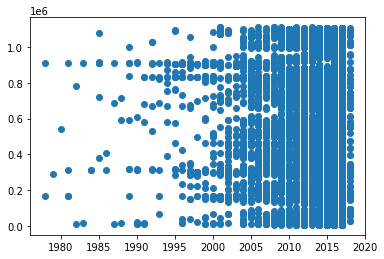

In [ ]:
plt.scatter(df[ 'dateEffetPolice_year'],df['CodeVehicule_id'] )
plt.show()

In [ ]:
print(len(X_train))
X_train

19381


array([[-1.15142069, -1.36298461,  1.18646109, ..., -0.08831708,
        -0.04490365,  0.1186378 ],
       [-1.15064915, -1.36298461,  0.95095308, ..., -0.08831708,
        -0.04490365,  0.1186378 ],
       [-1.15011539, -1.36298461,  0.69760355, ..., -0.08831708,
        -0.04490365,  0.1186378 ],
       ...,
       [-1.152086  , -1.36298461,  1.23641733, ..., -0.08831708,
        -0.04490365,  0.1186378 ],
       [-1.15207841, -1.36298461,  1.05443387, ..., -0.08831708,
        -0.04490365,  0.1186378 ],
       [-1.15207082, -1.36298461, -0.19447225, ..., -0.08831708,
        -0.04490365,  0.1186378 ]])

###DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=2)
y_pred = db.fit_predict(X_train)
a=pd.DataFrame(data= y_pred)
print(np.count_nonzero(y_pred == 1))
print(np.count_nonzero(y_pred == 0))
print(np.count_nonzero(y_pred == -1))

2
2
18772


In [ ]:
pd.set_option("display.max_rows", 20 )
w=pd.concat([X_t, a], axis=1).set_index('CodeVehicule_id')
w[w[0]==-1]

,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEcheancePolice,ETAT_VEHICULE,CodeBonusMalus_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,dateInsertion,numImmatriculation,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos,typeImmatriculation_CD,typeImmatriculation_CMD,typeImmatriculation_ES,typeImmatriculation_MD,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,0
CodeVehicule_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
240354.0,269447.0,0.0,849.0,1.0,7073.0,0.0,1.0,0.0,3.13,1.0,270626.0,230017.0,229942.0,1.0,2.0,2.0,80.0,0.0,2200.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2013.0,0.016110,0.999870,0.173648,0.984808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
240640.0,269752.0,0.0,783.0,1.0,7677.0,0.0,1.0,1.0,3.14,1.0,270931.0,230292.0,230217.0,1.0,2.0,2.0,80.0,0.0,14918.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2014.0,0.014959,0.999888,0.173648,0.984808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
240806.0,269963.0,0.0,712.0,1.0,11200.0,0.0,1.0,1.0,3.14,1.0,271142.0,230457.0,230382.0,1.0,4.0,4.0,100.0,0.0,4341.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2017.0,0.014959,0.999888,0.173648,0.984808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
240816.0,269978.0,0.0,877.0,3.0,11201.0,0.0,1.0,1.0,3.14,1.0,271157.0,230467.0,230392.0,1.0,4.0,4.0,100.0,0.0,5950.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2017.0,0.014959,0.999888,0.173648,0.984808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
240849.0,270019.0,0.0,632.0,1.0,11202.0,0.0,1.0,1.0,3.14,1.0,271198.0,230497.0,230422.0,1.0,6.0,6.0,140.0,0.0,11512.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2017.0,0.014959,0.999888,0.173648,0.984808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425238.0,496292.0,0.0,448.0,1.0,5907.0,0.0,1.0,1.0,9.15,1.0,500802.0,407659.0,407686.0,1.0,1.0,1.0,70.0,0.0,14420.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2009.0,0.013962,0.999903,0.058145,0.998308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
425434.0,496493.0,0.0,874.0,1.0,8797.0,0.0,1.0,1.0,9.15,1.0,501003.0,407829.0,407856.0,1.0,5.0,5.0,120.0,0.0,1083.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2015.0,0.013962,0.999903,0.058145,0.998308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
425457.0,496517.0,0.0,451.0,1.0,8798.0,0.0,1.0,1.0,9.15,1.0,501027.0,407850.0,407877.0,5.0,3.0,3.0,100.0,0.0,2238.0,2017.0,0.041876,0.999123,0.052336,0.99863,1900.0,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900.0,2015.0,0.013962,0.999903,0.058145,0.998308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0


###KMeans


**find the k value**

In [ ]:
inertia =[]
K = np.arange(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    inertia.append(km.inertia_)

In [ ]:
print(inertia)

[736478.0000000001, 664435.5820143088, 602558.4663255981, 571544.5561958901, 541657.2341081683, 504370.1497301314, 490529.86966135475, 458397.98354154936, 443932.60286622716, 418747.80147811206, 402347.9400747462, 376653.7328604255, 361271.7400521665, 345748.74924991943, 329629.2505503273, 303696.0000882582, 295973.66946846934, 279114.83803939394, 268553.75088207086, 256330.14295521844, 245621.84674835994, 229257.5715858578, 221877.75212515637, 216250.02068443966, 212323.38366617414, 209173.2294613859, 202519.19684578956, 199230.6031920251, 196451.96487754292]


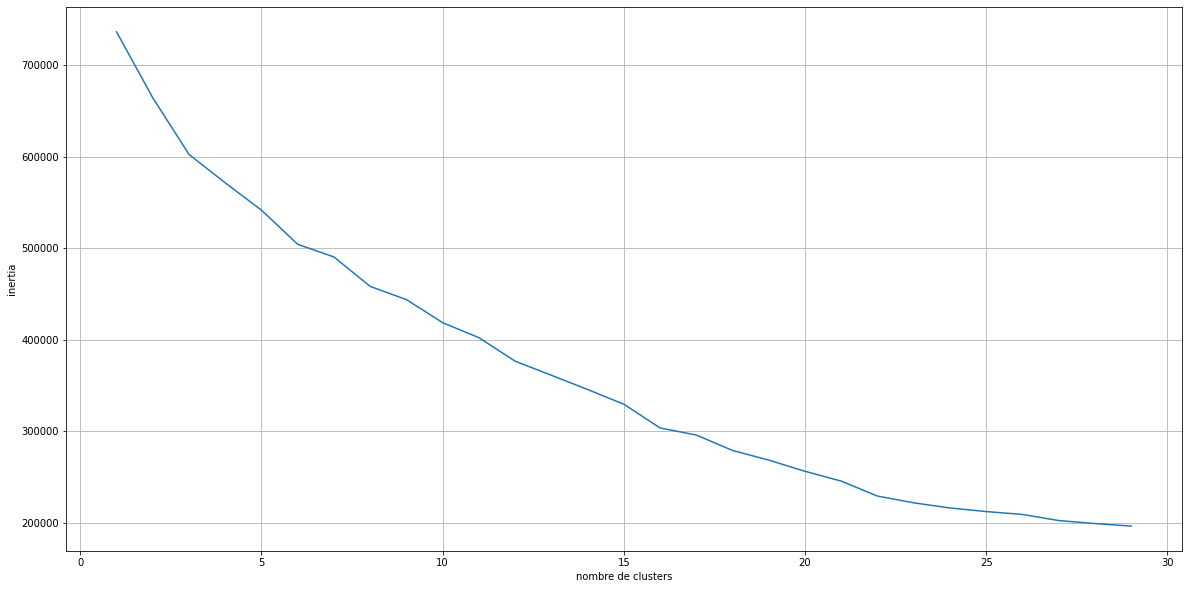

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(K, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

In [ ]:
nb_clusters=29
km = KMeans( n_clusters=nb_clusters)
km.fit(X_train)
y_pred = km.predict(X_train)
for i in np.arange(0,nb_clusters):
  print(np.count_nonzero(y_pred == i))

974
2086
1390
1694
1348
2583
159
698
1
148
95
27
15
2
799
39
423
1
1
48
717
655
621
112
1858
628
977
548
734


In [ ]:
#plt.scatter(X_df[ 'dateEffetPolice_year'],X_df['CodeVehicule_id'] , c = km.predict(X_train) )

In [ ]:
a=pd.DataFrame(data= y_pred)
b=pd.DataFrame(data= X_train,columns=columns_list)
pd.set_option("display.max_rows", 18964)
ab=pd.concat([a,b], axis=1).set_index('CodeVehicule_id')
ab.sort_index()[['dateEffetPolice_year',0]]

,dateEffetPolice_year,0
CodeVehicule_id,,
-1.675013,0.457489,5
-1.675013,-1.628647,26
-1.673686,0.196722,7
-1.673069,0.718256,27
-1.673069,0.457489,26
...,...,...
2.045531,-1.628647,25
2.045646,-1.628647,7
2.045923,-1.367880,25


###Anomaly detection with autoencoders

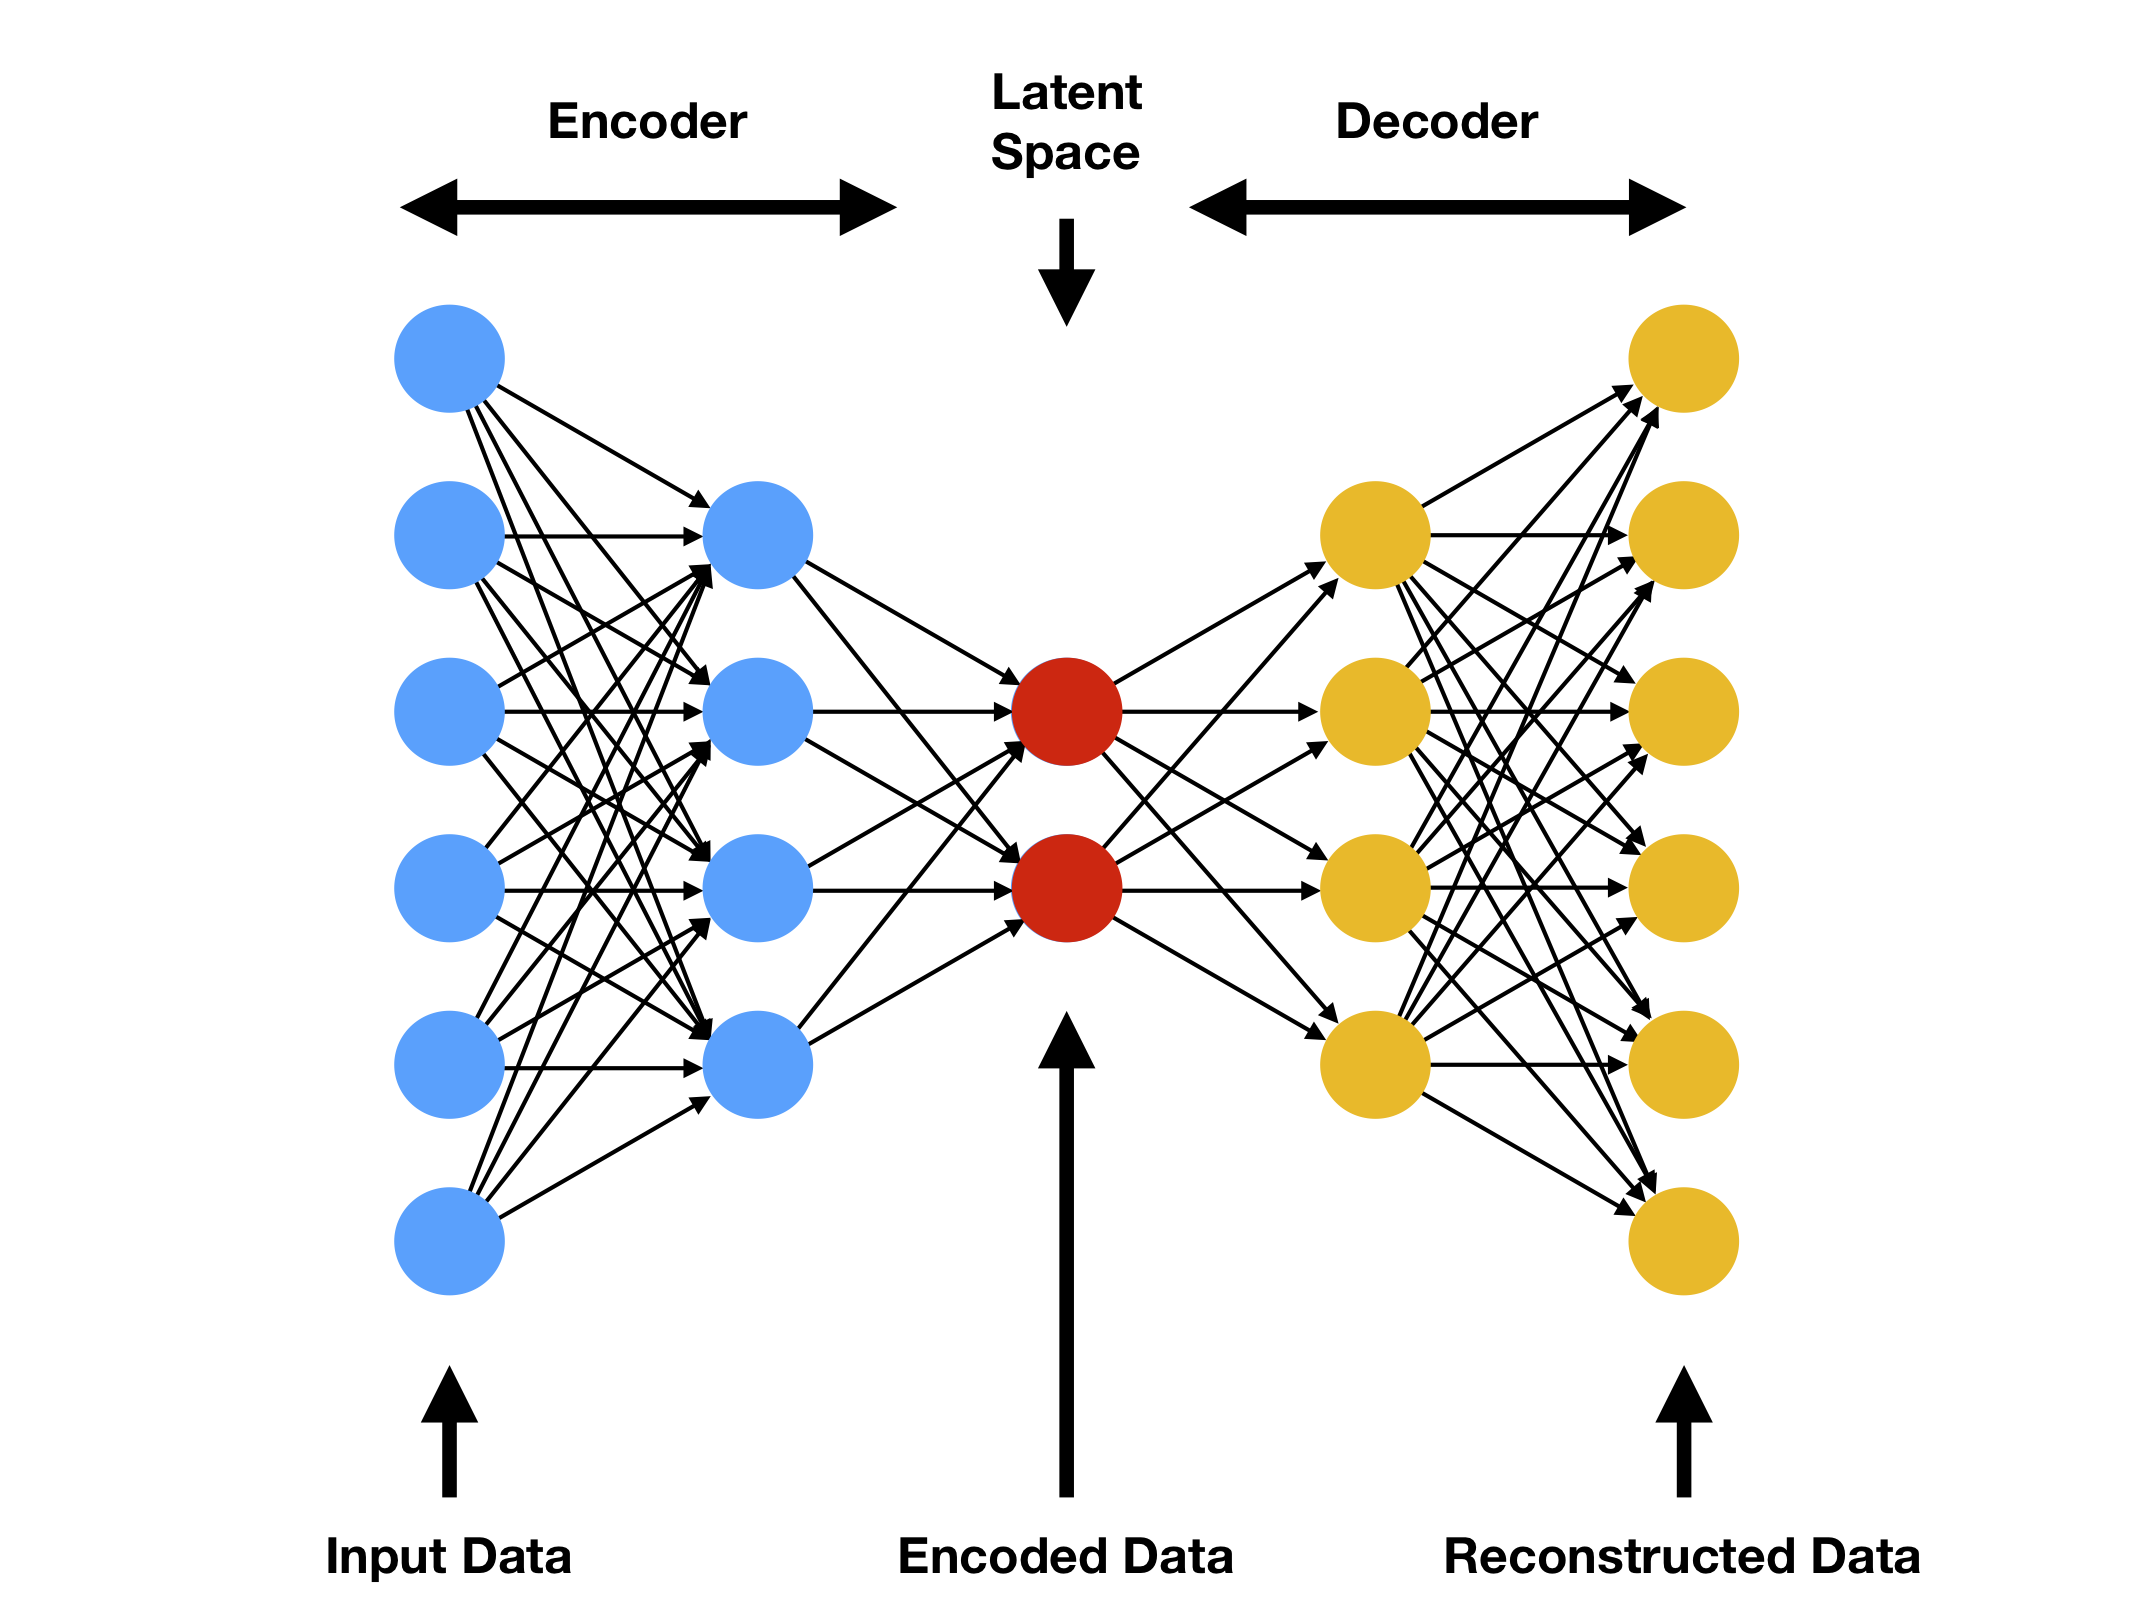

[Documentation](https://www.tensorflow.org/tutorials/generative/autoencoder#third_example_anomaly_detection)

In [ ]:
pd.set_option("display.max_rows", 20)
test=df.groupby(['CodeVehicule_id']).count()
test
test_2=test[test.codeCompagnie_id>1]
print(test_2.index.get_level_values('CodeVehicule_id')[0])
df=df.loc[df['CodeVehicule_id'].isin(test_2.index.get_level_values('CodeVehicule_id').values)]

6488


In [ ]:
df.shape

(6959, 61)

In [ ]:
input_img = keras.Input(shape=(len(columns_list),))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(len(columns_list), activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train,epochs=100,batch_size=256,shuffle=True,validation_data=(X_train, X_train))

Epoch 1/100
76/76 [==============================] - 1s 7ms/step - loss: -5.2778 - val_loss: -452.5194
Epoch 2/100
76/76 [==============================] - 0s 5ms/step - loss: -13159.5682 - val_loss: -292100.6562
Epoch 3/100
76/76 [==============================] - 0s 5ms/step - loss: -1191582.3366 - val_loss: -9670602.0000
Epoch 4/100
76/76 [==============================] - 0s 5ms/step - loss: -21586326.4935 - val_loss: -97401120.0000
Epoch 5/100
76/76 [==============================] - 0s 5ms/step - loss: -165708331.4286 - val_loss: -524803328.0000
Epoch 6/100
76/76 [==============================] - 0s 5ms/step - loss: -781536692.7792 - val_loss: -1941514368.0000
Epoch 7/100
76/76 [==============================] - 0s 5ms/step - loss: -2609123750.2338 - val_loss: -5662813696.0000
Epoch 8/100
76/76 [==============================] - 0s 5ms/step - loss: -7387789990.2338 - val_loss: -13893170176.0000
Epoch 9/100
76/76 [==============================] - 0s 5ms/step - loss: -16908306112

In [ ]:
a=autoencoder.predict(X_train)
print(a.shape)
pd.set_option("display.max_rows", 19 )
dff= pd.DataFrame(data=a)
dff

(19381, 49)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(dff[1])
print(dff[0].value_counts())

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19376    0.0
19377    0.0
19378    0.0
19379    0.0
19380    0.0
Name: 1, Length: 19381, dtype: float32
0.0    15587
1.0     3794
Name: 0, dtype: int64


In [ ]:
for i in np.arange(0,len(columns_list)):
  print('i=',i,'\n',dff[i].value_counts())

i= 0 
 0.0    15587
1.0     3794
Name: 0, dtype: int64
i= 1 
 0.0    15587
1.0     3794
Name: 1, dtype: int64
i= 2 
 0.0    19381
Name: 2, dtype: int64
i= 3 
 0.0    19381
Name: 3, dtype: int64
i= 4 
 0.0    19381
Name: 4, dtype: int64
i= 5 
 0.0    19381
Name: 5, dtype: int64
i= 6 
 0.0    19381
Name: 6, dtype: int64
i= 7 
 0.0    19381
Name: 7, dtype: int64
i= 8 
 0.0    19381
Name: 8, dtype: int64
i= 9 
 0.0    19381
Name: 9, dtype: int64
i= 10 
 0.0    15587
1.0     3794
Name: 10, dtype: int64
i= 11 
 0.0    15587
1.0     3794
Name: 11, dtype: int64
i= 12 
 0.0    15587
1.0     3794
Name: 12, dtype: int64
i= 13 
 0.0    15587
1.0     3794
Name: 13, dtype: int64
i= 14 
 1.0    15079
0.0     4302
Name: 14, dtype: int64
i= 15 
 0.0    15587
1.0     3794
Name: 15, dtype: int64
i= 16 
 0.0    19381
Name: 16, dtype: int64
i= 17 
 0.0    15587
1.0     3794
Name: 17, dtype: int64
i= 18 
 0.0    19381
Name: 18, dtype: int64
i= 19 
 0.0    19381
Name: 19, dtype: int64
i= 20 
 1.0    15332
0.

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(len(columns_list), activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')
history=autoencoder.fit(X_train, X_train,epochs=20,batch_size=512,shuffle=True,validation_data=(X_train, X_train))

Epoch 1/20
38/38 [==============================] - 1s 8ms/step - loss: 0.7198 - val_loss: 0.6002
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5317 - val_loss: 0.4231
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.4160 - val_loss: 0.4120
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4111 - val_loss: 0.4083
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.4061 - val_loss: 0.3974
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3960 - val_loss: 0.3858
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3834 - val_loss: 0.3759
Epoch 8/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3752 - val_loss: 0.3727
Epoch 9/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3739 - val_loss: 0.3706
Epoch 10/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3708 - val_loss: 0.3692
Epoch 11/20
38/38 [

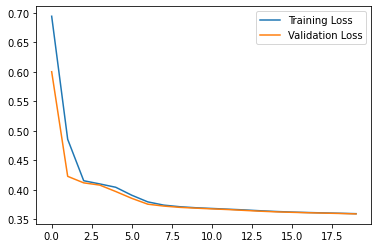

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
a=autoencoder.predict(X_train)
print(a.shape)
pd.set_option("display.max_rows", 19 )
dff= pd.DataFrame(data=a)
dff

(19381, 49)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.000034,0.005533,1.377447e-12,9.271061e-12,0.001227,4.830001e-18,0.085955,0.639301,0.000524,1.439760e-21,0.000030,0.000012,0.000005,0.000005,3.330927e-12,0.000002,0.000010,1.961559e-09,2.717507e-13,6.914336e-07,2.692619e-20,0.155682,7.530177e-20,1.534783e-18,0.097459,1.052631e-10,1.0,2.988253e-14,1.0,6.101503e-18,4.334665e-15,1.0,9.190717e-21,1.0,7.945565e-13,0.032794,1.205122e-11,0.256570,3.296090e-13,0.112274,7.922149e-18,1.568189e-13,7.507998e-14,2.458284e-15,2.320604e-15,7.684714e-17,1.758209e-13,3.414652e-18,0.116486
1,0.000064,0.005419,6.179040e-12,4.800115e-11,0.007172,2.974045e-17,0.083584,0.660217,0.000944,1.347529e-20,0.000050,0.000011,0.000004,0.000004,1.171281e-11,0.000005,0.000021,7.683925e-09,5.904045e-13,9.058385e-07,2.601477e-19,0.149078,5.113790e-19,1.195624e-17,0.088507,4.607827e-10,1.0,9.688092e-14,1.0,3.044503e-17,1.550596e-14,1.0,1.004176e-19,1.0,2.445913e-12,0.095597,3.222362e-11,0.271688,8.793294e-13,0.118284,5.115161e-17,4.900781e-13,2.706205e-13,1.254057e-14,1.284460e-14,4.631136e-16,5.245791e-13,2.569770e-17,0.106708
2,0.000196,0.003378,1.692698e-10,1.034097e-09,0.200181,1.715819e-15,0.083023,0.670114,0.001780,1.244366e-18,0.000151,0.000006,0.000002,0.000002,1.394526e-10,0.000065,0.000087,1.502174e-07,2.973434e-12,1.692492e-06,2.441907e-17,0.150091,2.266992e-17,7.041008e-16,0.089158,1.384573e-08,1.0,1.147148e-12,1.0,1.051395e-15,1.978498e-13,1.0,1.129376e-17,1.0,2.676292e-11,0.573742,2.738015e-10,0.268763,7.449976e-12,0.134700,1.982020e-15,6.983777e-12,4.803291e-12,4.030796e-13,4.709289e-13,1.374137e-14,4.622126e-12,1.463687e-15,0.107828
3,0.000254,0.004261,1.656369e-10,1.256368e-09,0.232302,1.832593e-15,0.077724,0.679593,0.002254,1.466641e-18,0.000193,0.000008,0.000002,0.000002,1.486604e-10,0.000064,0.000091,1.492432e-07,3.283260e-12,1.554280e-06,3.194716e-17,0.143119,2.407794e-17,7.977077e-16,0.082209,1.338362e-08,1.0,1.064870e-12,1.0,1.121820e-15,2.104923e-13,1.0,1.290265e-17,1.0,2.908853e-11,0.584680,2.724274e-10,0.267015,7.774400e-12,0.138403,2.140811e-15,7.010589e-12,4.865197e-12,4.048688e-13,5.336628e-13,1.518923e-14,5.466886e-12,1.849857e-15,0.100655
4,0.000308,0.003808,1.604805e-10,1.128900e-09,0.207311,1.966116e-15,0.080839,0.671351,0.001921,1.402718e-18,0.000243,0.000009,0.000003,0.000003,1.355837e-10,0.000069,0.000083,1.485884e-07,3.562993e-12,1.431018e-06,3.439283e-17,0.148240,2.030902e-17,7.103462e-16,0.087727,1.360382e-08,1.0,1.017786e-12,1.0,1.093328e-15,2.081794e-13,1.0,1.142375e-17,1.0,3.007998e-11,0.587356,2.914875e-10,0.263679,7.829220e-12,0.136876,1.979322e-15,7.132925e-12,4.947934e-12,3.926811e-13,5.167467e-13,1.358226e-14,5.842392e-12,1.824662e-15,0.106622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19376,0.000217,0.004648,1.078289e-10,6.454104e-10,0.190065,1.007367e-15,0.080480,0.667755,0.001231,6.364773e-19,0.000173,0.000008,0.000003,0.000003,9.643730e-11,0.000068,0.000068,1.023082e-07,2.465966e-12,1.233226e-06,1.364367e-17,0.148391,1.077284e-17,3.489769e-16,0.088366,9.465298e-09,1.0,6.519918e-13,1.0,6.354351e-16,1.276350e-13,1.0,4.789947e-18,1.0,1.938523e-11,0.522714,1.943570e-10,0.260330,5.541233e-12,0.131800,9.917942e-16,4.523261e-12,3.060171e-12,2.217567e-13,2.883891e-13,6.888383e-15,3.803435e-12,8.124146e-16,0.107166
19377,0.000101,0.005061,1.343426e-11,1.235102e-10,0.011000,9.882286e-17,0.080445,0.664465,0.001751,5.546921e-20,0.000081,0.000013,0.000005,0.000004,2.321220e-11,0.000007,0.000030,1.479438e-08,1.155343e-12,1.225796e-06,1.171876e-18,0.146733,1.688043e-18,4.222780e-17,0.086514,9.410677e-10,1.0,2.058219e-13,1.0,9.148934e-17,3.619499e-14,1.0,4.369704e-19,1.0,5.400145e-12,0.140677,6.182827e-11,0.265082,1.772554e-12,0.129917,1.611671e-16,1.161811e-12,6.515269e-13,3.384624e-1

In [ ]:
dff.idxmax(axis = 1, skipna = True)

0        26
1        26
2        26
3        26
4        26
         ..
19376    26
19377    26
19378    26
19379    26
19380    26
Length: 19381, dtype: int64

In [ ]:
q=pd.concat([df[['CodeVehicule_id']],dff.idxmax(axis = 1, skipna = True)], axis=1).set_index('CodeVehicule_id')
q

,0
CodeVehicule_id,
NaN,26.0
NaN,26.0
NaN,26.0
NaN,26.0
NaN,26.0
...,...
504552.0,NaN
506885.0,NaN
506885.0,NaN


In [ ]:
pd.set_option("display.max_rows", 19381)
q[0].value_counts()

26.0    14032
33.0     2612
31.0     2055
28.0      679
0.0         2
4.0         1
Name: 0, dtype: int64

In [ ]:
a=q[q[0]==33].groupby(['CodeVehicule_id']).count()
a

,0
CodeVehicule_id,
7570.0,2
7911.0,1
7930.0,1
10434.0,1
10943.0,1
12581.0,1
15144.0,1
16059.0,2
16082.0,1


In [ ]:
df[df.CodeVehicule_id==713518]['dateEffetPolice_year']

12161    2016
12162    2017
Name: dateEffetPolice_year, dtype: int64

##Fraud Detection Using Data Analytics

In [ ]:
pd.set_option("display.max_rows", 18557)
test=df.groupby(['CodeVehicule_id','dateEffetPolice_year','Etat_Police']).count()
test

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_2=test[test.CodePolice_id>1]
pd.set_option("display.max_rows", 19148 )
test_2

,,,Unnamed: 0,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,dateEcheancePolice,CodeBonusMalus_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,puissanceFiscal,dateInsertion,codeMarque,numImmatriculation,dateAffectation_year,dateAffectation_day_sin,dateAffectation_day_cos,dateAffectation_month_sin,dateAffectation_month_cos,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos,naturePolice,typePolice,ETAT_VEHICULE,typeImmatriculation_CD,typeImmatriculation_CMD,typeImmatriculation_ES,typeImmatriculation_MD,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,energie_0,energie_ESS-GAZ GPL,energie_ESSENCE,energie_GASOIL
CodeVehicule_id,dateEffetPolice_year,Etat_Police,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8586,2017,1.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
11765,2016,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
15359,2017,1.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
16082,2017,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
16685,2016,0.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
25169,2017,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
26265,2017,1.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
55674,2015,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
57636,2016,0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
df['fraude_multi_assurance']=0
df['fraude_multi_assurance'].loc[df['CodeVehicule_id'].isin(test_2.index.get_level_values('CodeVehicule_id').values)]=1
df['fraude_multi_assurance'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

0    6339
1     620
Name: fraude_multi_assurance, dtype: int64

In [ ]:
df[df['fraude_multi_assurance']==1]

,Unnamed: 0,CodePolice_id,codeCompagnie_id,codeAgence,typeIntermediaire,numPolice,dateEcheancePolice,CodeBonusMalus_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,puissanceFiscal,dateInsertion,codeMarque,numImmatriculation,dateAffectation_year,dateAffectation_day_sin,dateAffectation_day_cos,dateAffectation_month_sin,dateAffectation_month_cos,dateInsertion_year,dateInsertion_day_sin,dateInsertion_day_cos,dateInsertion_month_sin,dateInsertion_month_cos,Date_Suspenssion_year,Date_Suspenssion_day_sin,Date_Suspenssion_day_cos,Date_Suspenssion_month_sin,Date_Suspenssion_month_cos,DATE_RESILIATION_month_cos,DATE_RESILIATION_month_sin,DATE_RESILIATION_day_cos,DATE_RESILIATION_day_sin,DATE_RESILIATION_year,dateEffetPolice_year,dateEffetPolice_day_sin,dateEffetPolice_day_cos,dateEffetPolice_month_sin,dateEffetPolice_month_cos,naturePolice,typePolice,Etat_Police,ETAT_VEHICULE,typeImmatriculation_CD,typeImmatriculation_CMD,typeImmatriculation_ES,typeImmatriculation_MD,typeImmatriculation_PAT,typeImmatriculation_REM,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,energie_0,energie_ESS-GAZ GPL,energie_ESSENCE,energie_GASOIL,fraude_multi_assurance
16,16,270580,0.0,619.0,1,9699.0,3.25,271759,211727,230942,230867,1,4,4,100,4,0.0,29,5232.0,2016,0.008377,0.999965,0.173648,0.984808,2017,0.041876,0.999123,0.052336,0.998630,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.008377,0.999965,0.173648,0.984808,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
18,18,232872,0.0,703.0,1,10448.0,10.27,234051,211727,189671,189595,1,2,2,80,4,0.0,29,5232.0,2016,0.007757,0.999970,0.052336,0.998630,2017,0.041876,0.999123,0.052336,0.998630,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.007757,0.999970,0.052336,0.998630,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
73,73,273727,0.0,849.0,1,9689.0,3.23,274906,244092,233581,233506,1,2,2,80,5,12.0,30,2551.0,2016,0.009106,0.999959,0.173648,0.984808,2017,0.009106,0.999959,0.052336,0.998630,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.009106,0.999959,0.173648,0.984808,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
74,74,928113,13.0,428.0,1,15488.0,3.08,932896,244092,718770,718778,1,8,8,200,5,12.0,30,2551.0,2016,0.026177,0.999657,0.173648,0.984808,2017,0.009106,0.999959,0.052336,0.998630,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.026177,0.999657,0.173648,0.984808,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
300,300,593080,0.0,576.0,1,11972.0,11.03,597620,509258,231051,230976,5,3,3,100,12,20.0,177,5389.0,2017,0.069756,0.997564,0.047582,0.998867,2017,0.104528,0.994522,0.047582,0.998867,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2017,0.069756,0.997564,0.047582,0.998867,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
301,301,1269255,10.0,208.0,2,3768.0,5.18,1274047,509258,79124,79043,3,4,4,120,12,20.0,177,5389.0,2017,0.052336,0.998630,0.130526,0.991445,2017,0.104528,0.994522,0.047582,0.998867,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.011635,0.999932,0.104528,0.994522,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
302,302,929224,13.0,321.0,1,15405.0,1.06,934007,509258,719402,719410,5,6,6,170,12,20.0,177,5389.0,2016,0.034899,0.999391,0.500000,0.866025,2017,0.104528,0.994522,0.047582,0.998867,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148,0.207912,1900,2016,0.034899,0.999391,0.500000,0.866025,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
351,351,925256,13.0,416.0,1,17482.0,4.11,930039,149370,548148,548152,1,4,4,100,7,18.0,103,3173.0,2017,0.019039,0.999819,0.130526,0.991445,2017,0.006756,0.999977,0.052336,0.998630,1900,0.207912,0.978148,0.5,0.866025,0.866025,0.5,0.978148

In [ ]:
df.to_csv('new_Vehicule_police_class_Labeliser.csv')

#**Classification**

## Data loading

In [ ]:
columns_list=['CodePolice_id', 'codeCompagnie_id', 'codeAgence',
       'typeIntermediaire', 'numPolice', 'naturePolice', 'typePolice',
       'Etat_Police', 'dateEcheancePolice', 'ETAT_VEHICULE',
       'CodeBonusMalus_id', 'CodeVehicule_id', 'CodeAssure_id',
       'CodeSouscripteur_id', 'codeUsage', 'classeBonusMalus', 'coefBonusMalus',
       'dateInsertion', 'numImmatriculation',
       'dateInsertion_year', 'dateInsertion_day_sin', 'dateInsertion_day_cos',
       'dateInsertion_month_sin', 'dateInsertion_month_cos',
       'Date_Suspenssion_year', 'Date_Suspenssion_day_sin',
       'Date_Suspenssion_day_cos', 'Date_Suspenssion_month_sin',
       'Date_Suspenssion_month_cos', 'DATE_RESILIATION_month_cos',
       'DATE_RESILIATION_month_sin', 'DATE_RESILIATION_day_cos',
       'DATE_RESILIATION_day_sin', 'DATE_RESILIATION_year',
       'dateEffetPolice_year', 'dateEffetPolice_day_sin',
       'dateEffetPolice_day_cos', 'dateEffetPolice_month_sin',
       'dateEffetPolice_month_cos', 'typeImmatriculation_CD',
       'typeImmatriculation_CMD', 'typeImmatriculation_ES',
       'typeImmatriculation_MD', 'typeImmatriculation_PAT',
       'typeImmatriculation_REM', 'typeImmatriculation_RS',
       'typeImmatriculation_TRAC', 'typeImmatriculation_TU']      

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/new_Vehicule_police_class_Labeliser.csv')
X=df[columns_list]
y=df['fraude_multi_assurance']

In [ ]:
X.columns

Index(['CodePolice_id', 'codeCompagnie_id', 'codeAgence', 'typeIntermediaire',
       'numPolice', 'naturePolice', 'typePolice', 'Etat_Police',
       'dateEcheancePolice', 'ETAT_VEHICULE', 'CodeBonusMalus_id',
       'CodeVehicule_id', 'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage',
       'classeBonusMalus', 'coefBonusMalus', 'dateInsertion',
       'numImmatriculation', 'dateInsertion_year', 'dateInsertion_day_sin',
       'dateInsertion_day_cos', 'dateInsertion_month_sin',
       'dateInsertion_month_cos', 'Date_Suspenssion_year',
       'Date_Suspenssion_day_sin', 'Date_Suspenssion_day_cos',
       'Date_Suspenssion_month_sin', 'Date_Suspenssion_month_cos',
       'DATE_RESILIATION_month_cos', 'DATE_RESILIATION_month_sin',
       'DATE_RESILIATION_day_cos', 'DATE_RESILIATION_day_sin',
       'DATE_RESILIATION_year', 'dateEffetPolice_year',
       'dateEffetPolice_day_sin', 'dateEffetPolice_day_cos',
       'dateEffetPolice_month_sin', 'dateEffetPolice_month_cos',
       'type

In [ ]:
test=df.groupby(['CodeVehicule_id']).count()
test_2=test[test.codeCompagnie_id>1]
df=df.loc[df['CodeVehicule_id'].isin(test_2.index.get_level_values('CodeVehicule_id').values)]
X=df[columns_list]
y=df['fraude_multi_assurance']

## Techniques for Extremely Imbalanced Data

### **over_sampling**

Les méthodes d’Oversampling fonctionnent en augmentant le nombre d’observations de la (des) classe(s) minoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.

 Les méthodes d’Undersampling fonctionnent en diminuant le nombre d’observations de la  (des) classe(s) majoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.

Privilégiez le sous-échantillonnage lorsque vous disposez de grands jeux de données : des dizaines ou des centaines de milliers de cas ou plus.
Privilégiez le sur-échantillonnage lorsque vous ne disposez pas de beaucoup de données :des dizaines de milliers ou moins.

In [ ]:
# Sur-échantillonnage
rOs = RandomOverSampler()
X, y = rOs.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter = Counter(y)
print(counter)

Counter({0: 6339, 1: 6339})


### **Undersampling**

In [ ]:
rUs = RandomUnderSampler()
X, y = rUs.fit_resample(X, y)

NameError: ignored

In [ ]:
counter = Counter(y)
print(counter)

### **SMOTE**

**SMOTE** est une méthode de **sur-échantillonnage**. Elle fonctionne en créant des échantillons synthétiques à partir de la classe minoritaire au lieu de créer de simples copies

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

### **Clustering**

algorithme d’Undersampling  qui utilise des méthodes de **Clustering** pour générer un certain nombre de centroïdes à partir des données d’origine, afin de **perdre le moins d’information** possible sur la classe majoritair

In [ ]:
cc = ClusterCentroids(random_state=42)
X, y = cc.fit_resample(X, y)

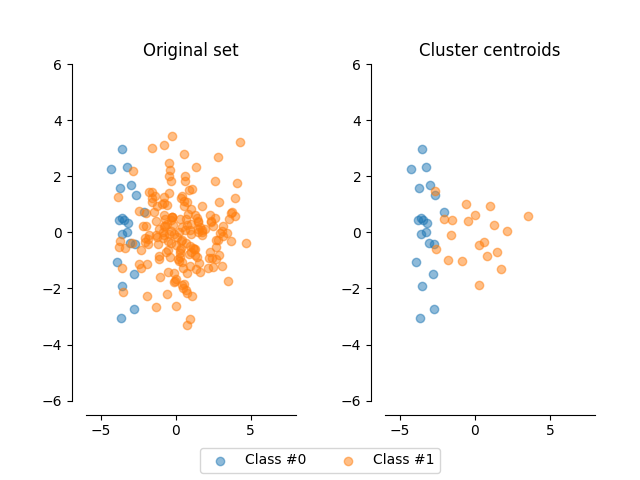

In [ ]:
counter = Counter(y)
print(counter)

## Dataset Splitting & Normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## BoostingClassifier

**Hyperparameter optimization**

In [ ]:
estimator = XGBClassifier(nthreads=-1)
params = {  
            "n_estimators": st.randint(3, 40),
            "max_depth": st.randint(3, 40),
            "learning_rate": st.uniform(0.05, 0.4),
            "colsample_bytree": st.beta(10, 1),
            "subsample": st.beta(10, 1),
            "gamma": st.uniform(0, 10),
            'objective': ['binary:logistic'],
            'scale_pos_weight': st.randint(0, 2),
            "min_child_weight": st.expon(0, 50),
        }
# Random Search Training with 5 folds Cross Validation
clf = RandomizedSearchCV(estimator, params, cv=5,
                         n_jobs=1, n_iter=100) 

In [ ]:
clf.fit(X_train_scaled, y_train)
best_params = clf.best_params_
best_score = clf.best_score_
print(best_params)
print(best_score)

{'colsample_bytree': 0.9721614888912435, 'gamma': 7.954323047922793, 'learning_rate': 0.3704698555845269, 'max_depth': 32, 'min_child_weight': 2.756549823953224, 'n_estimators': 39, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'subsample': 0.9976711090971402}
0.9406645355717455


**train the model**

In [ ]:
estimator = XGBClassifier(nthreads=-1,colsample_bytree= 0.9915252489995724, gamma= 2.421903823682098, learning_rate= 0.2198867677940603, max_depth= 34, min_child_weight= 1.7700660047913566, n_estimators= 25, objective= 'binary:logistic', scale_pos_weight= 1, subsample= 0.9165781297925666)
estimator.fit(X_train_scaled, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9915252489995724,
              gamma=2.421903823682098, learning_rate=0.2198867677940603,
              max_delta_step=0, max_depth=34,
              min_child_weight=1.7700660047913566, missing=None,
              n_estimators=25, n_jobs=1, nthread=None, nthreads=-1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9165781297925666, verbosity=1)

**model evaluation**

In [ ]:
estimator.score(X_test_scaled, y_test)

0.9641491395793499

RandomOverSampler
0.9646271510516252

Undersampling
0.94445

ClusterCentroids
0.9219858156028369


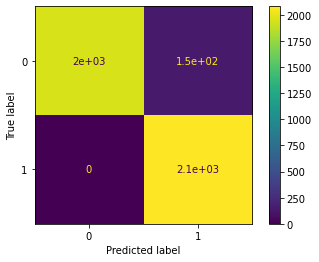

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2104
           1       0.93      1.00      0.97      2080

    accuracy                           0.96      4184
   macro avg       0.97      0.96      0.96      4184
weighted avg       0.97      0.96      0.96      4184



In [ ]:
plot_confusion_matrix(estimator,X_test_scaled, y_test)  
plt.show()
y_pred=estimator.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

**the results obtained for each Technique for extremely unbalanced data**

**RandomOverSampler**

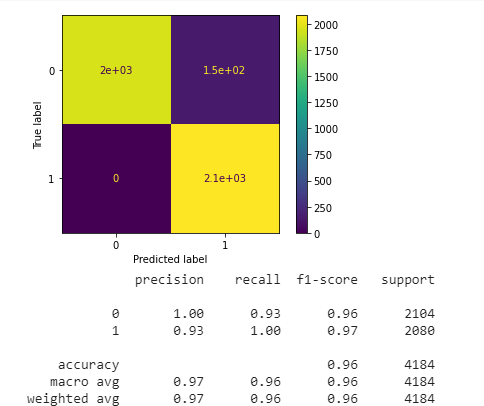


**Undersampling**

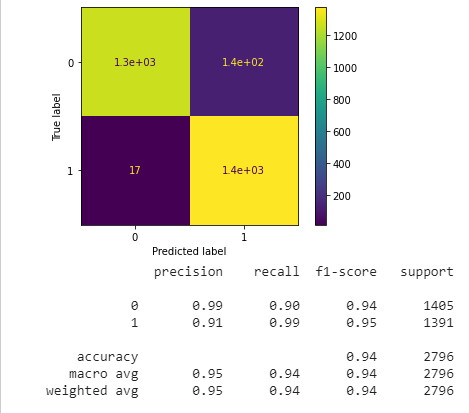

**SMOTE**

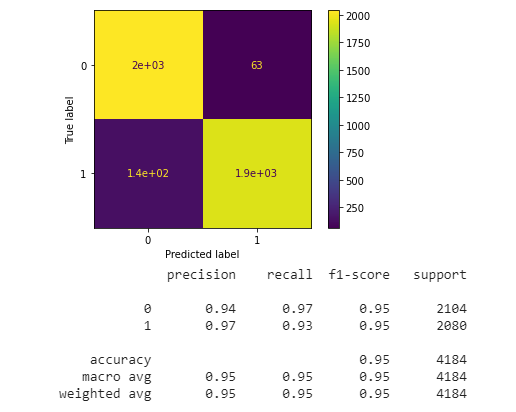

**ClusterCentroids** 

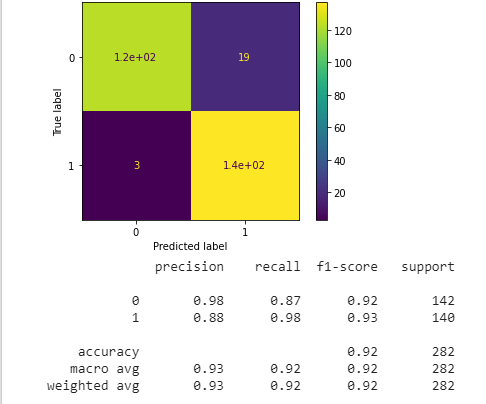

## GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.7734225621414914

**model evaluation**

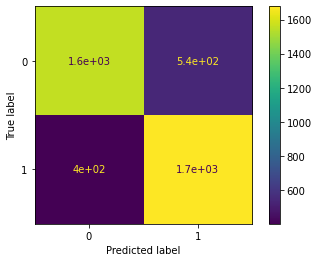

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2104
           1       0.75      0.81      0.78      2080

    accuracy                           0.77      4184
   macro avg       0.77      0.77      0.77      4184
weighted avg       0.77      0.77      0.77      4184



In [ ]:
plot_confusion_matrix(clf,X_test_scaled, y_test)  
plt.show()
y_pred=clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

## Neural network classification

In [ ]:
model = keras.Sequential()
model.add(Dense(60, input_dim=len(columns_list), activation='relu'))
model.add(Dense(60,  activation='relu'))
model.add(Dense(60,   activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Compile model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs = 20, batch_size = 10)

Epoch 1/20
850/850 [==============================] - 2s 1ms/step - loss: 0.6444 - accuracy: 0.6197
Epoch 2/20
850/850 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7266
Epoch 3/20
850/850 [==============================] - 1s 1ms/step - loss: 0.4940 - accuracy: 0.7616
Epoch 4/20
850/850 [==============================] - 1s 1ms/step - loss: 0.4505 - accuracy: 0.8001
Epoch 5/20
850/850 [==============================] - 1s 1ms/step - loss: 0.4062 - accuracy: 0.8226
Epoch 6/20
850/850 [==============================] - 1s 1ms/step - loss: 0.3677 - accuracy: 0.8361
Epoch 7/20
850/850 [==============================] - 1s 1ms/step - loss: 0.3213 - accuracy: 0.8592
Epoch 8/20
850/850 [==============================] - 1s 1ms/step - loss: 0.2883 - accuracy: 0.8787
Epoch 9/20
850/850 [==============================] - 1s 1ms/step - loss: 0.2707 - accuracy: 0.8838
Epoch 10/20
850/850 [==============================] - 1s 1ms/step - loss: 0.2268 - accuracy: 0.9101

**model evaluation**

In [ ]:
pred_train= model.predict(X_train_scaled)
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
pred_test= model.predict(X_test_scaled)
scores2 = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

Accuracy on training data: 0.9673887491226196% 
 Error on training data: 0.03261125087738037
Accuracy on test data: 0.9192160367965698% 
 Error on test data: 0.08078396320343018


In [ ]:
pred_test=np.rint(pred_test)
confusion_matrix(y_test, pred_test)

array([[1815,  289],
       [  49, 2031]])

In [ ]:
pred_test = (pred_test > 0.5)
pred_test
print(pred_test)

[[ True]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [ True]]


**the results obtained for each Technique for extremely unbalanced data**

**RandomOverSampler**

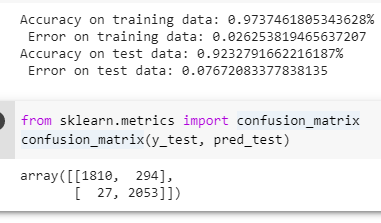

**Undersampling**

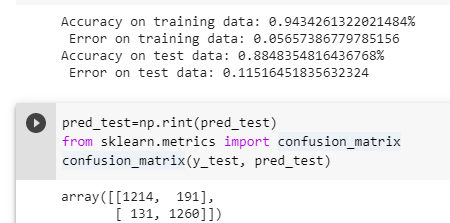

**SMOTE**

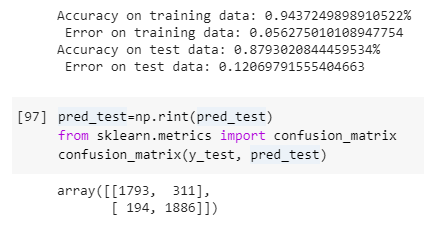

**ClusterCentroids**

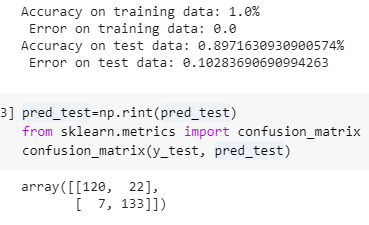

In [ ]:
X_train_scaled.shape[0]

8494

### Search Hyperparameters for Deep Learning

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Dense(60, input_dim=len(columns_list), activation='relu'))
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation='relu',input_dim=49))
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation='relu' ))
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation='relu' ))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])), metrics=['accuracy'])
    # model.fit(X_train_scaled, y_train, epochs = 20, batch_size = 10)
    return model


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='machinecurve_example')

In [ ]:
# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
validation_split = 0.2
# Perform random search
tuner.search(X_train_scaled, y_train,
             epochs=450,
             validation_split=validation_split)

In [ ]:
tuner.results_summary()

Results summary
Results in tuning_dir/machinecurve_example
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.001
Score: 0.9735138416290283
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.001
Score: 0.9711595177650452
Trial summary
Hyperparameters:
units: 448
learning_rate: 0.001
Score: 0.9705709218978882
Trial summary
Hyperparameters:
units: 320
learning_rate: 0.0001
Score: 0.968805193901062
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.01
Score: 0.9646850824356079
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.01
Score: 0.9640965461730957
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 0.9611536264419556
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.01
Score: 0.9605650305747986
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.0001
Score: 0.9599764347076416
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.

In [ ]:
# Get best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model

In [ ]:
# Fit data to model
best_score=-1
best_batch=-1
best_epochs=-1
no_classes = 10
no_epochs = 25
validation_split = 0.2
verbosity = 1
batch_size = 50
"""
epochs_tab = np.arange(10,250,50)
batch_sizes = [20,32,64, 128, 256, 450]
""" 
epochs_tab = np.arange(10,51,10)
batch_sizes = [20,32,40]
for j in range(len(epochs_tab)):
    for i in range(len(batch_sizes)):
        history = best_model.fit(X_train_scaled, y_train,
                  batch_size=batch_sizes[i],
                  epochs=epochs_tab[j],
                  verbose=verbosity,
                  validation_split=validation_split)
        scores2 = best_model.evaluate(X_test_scaled, y_test, verbose=0)
        if scores2[1]>best_score:
          best_score=scores2[1]
          best_batch=batch_sizes[i]
          best_epochs=epochs_tab[j]


Epoch 1/10
340/340 [==============================] - 2s 5ms/step - loss: 2.8340e-09 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.9735
Epoch 2/10
340/340 [==============================] - 2s 5ms/step - loss: 0.1106 - accuracy: 0.9812 - val_loss: 0.2775 - val_accuracy: 0.9464
Epoch 3/10
340/340 [==============================] - 2s 5ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.2928 - val_accuracy: 0.9588
Epoch 4/10
340/340 [==============================] - 2s 5ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.3035 - val_accuracy: 0.9635
Epoch 5/10
340/340 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9958 - val_loss: 0.3429 - val_accuracy: 0.9535
Epoch 6/10
340/340 [==============================] - 2s 5ms/step - loss: 0.0202 - accuracy: 0.9953 - val_loss: 0.4313 - val_accuracy: 0.9559
Epoch 7/10
340/340 [==============================] - 2s 5ms/step - loss: 0.0236 - accuracy: 0.9948 - val_loss: 0.3219 - val_accuracy: 0.9641
Ep

In [ ]:
print(best_score)
print(best_batch)
print(best_epochs)

print(best_score)
print(best_batch)
print(best_epochs)

0.9581739902496338
450
150

In [ ]:
best_model.fit(X_train_scaled, y_train,
                  batch_size=450,
                  epochs=150,
                  verbose=verbosity,
                  validation_split=validation_split)

In [ ]:
best_model.save('multi_insurane_model.h5') 

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2940      
_________________________________________________________________
dense_1 (Dense)              (None, 416)               25376     
_________________________________________________________________
dense_2 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_3 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 417       
Total params: 375,677
Trainable params: 375,677
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 O